In [ ]:
# Instalar Librerías
# !pip install opencv-python matplotlib

In [2]:
# Cargar Librerías
import cv2
import matplotlib.pyplot as plt

# 1.1) Conversión de BGR(opencv) a RGB(matplotlib)

In [5]:
image_path = './data/cctv_image.jpg'
image = cv2.imread(image_path)

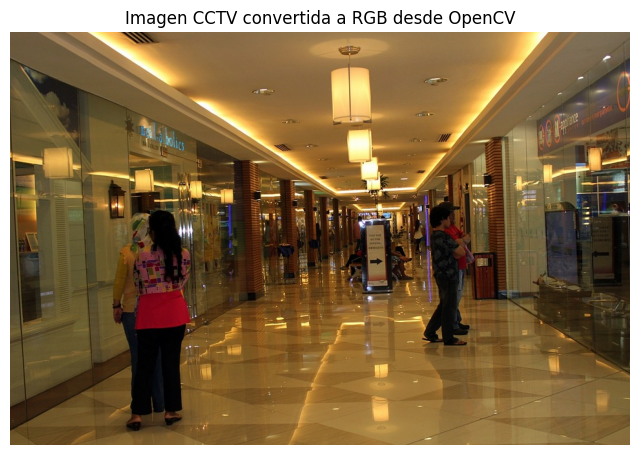

In [9]:
# verificamos si la imagen se cargó correctamente
if image is None:
    print("Error: No se pudo cargar la imagen.")
else:
    # convertimos la imagen de BGR a RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # mostrar la imagen usando matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.title('Imagen CCTV convertida a RGB desde OpenCV')
    plt.axis('off')
    plt.show()

# 1.2) Captura y visualización de video en tiempo real

In [ ]:
'''
Para macos crear un script a parte y ejecutar. Si se ejecuta desde jupyter se crashea el kernel.
'''
# abrir la cámara web
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: No se pudo abrir la cámara.")
else:
    while True:
        # capturar frame por frame
        ret, frame = cap.read()
        if not ret:
            print("Error: No se pudo capturar el frame.")
            break
        
        # mostrar frame con la captura del frame cctv
        cv2.imshow('CCTV Frame - Press \'q\' to close window ', frame)
        
        # esperar 1ms para detectar si se presiona la tecla 'q' para salir
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
# liberar el objeto de captura y cerrar todas las ventanas
cap.release()
cv2.destroyAllWindows()

# 1.3) Cargar un vídeo

In [ ]:
# path video
video_path = './data/store-aisle-detection.mp4'

# cargar video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: No se pudo abrir el video.")
else:
    while True:
        # capturar frame por frame
        ret, frame = cap.read()
        if not ret:
            print("Error: No se pudo leer el frame.")
            break
        
        # mostrar el frame en una ventana
        cv2.imshow('Frame del video CCTV - Presione \'q\' para cerrar la ventana', frame)
        
        # esperar 1 ms para detectar si se presiona la tecla 'q' para salir
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    # liberar el objeto de captura y cerrar todas las ventanas
    cap.release()
    cv2.destroyAllWindows()

: 

# 2.1) Ajuste de brillo y contraste

In [14]:
# cargar la imagen cctv
image_path = './data/cctv_image.jpg'
image = cv2.imread(image_path)
if image is None:
    print("Error: No se pudo cargar la imagen.")
    exit()
    
# ajuste de brillo y contraste: new_image = alpha * image * beta
alpha = 1.2 # Contraste (1.0-3.0) mayor a 1 para aumentar contraste
beta = 50   # Brillo (0-100) positivo para aumentar brillo
adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

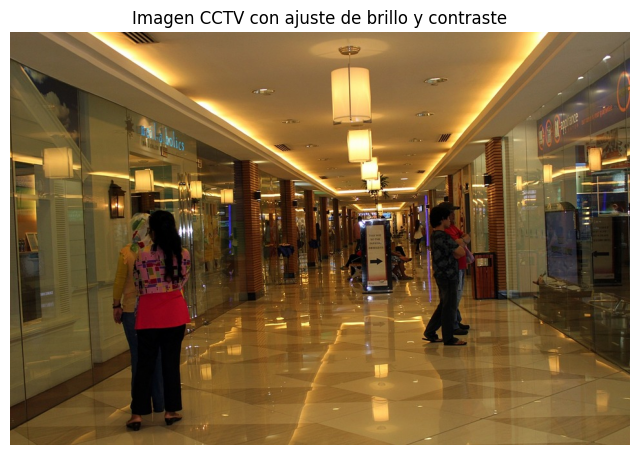

In [16]:
# convertir de BGR a RGB para mostrar con matplotlib
adjusted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # type: ignore

# mostrar la imagen original y la ajustada
plt.figure(figsize=(8, 6))
plt.imshow(adjusted)
plt.title('Imagen CCTV con ajuste de brillo y contraste')
plt.axis('off')
plt.show()

In [17]:
# guardar la imagen ajustada
output_path = './data/cctv_image_adjusted.jpg'
cv2.imwrite(output_path, adjusted)

True

# 2.2) Correción de color y normalización

In [18]:
import numpy as np

In [19]:
# convertir la imagen a espacio HSV para modificar la saturación
hsv = cv2.cvtColor(adjusted, cv2.COLOR_BGR2HSV)

In [21]:
h, s, v = cv2.split(hsv)

# aumentar la saturación
saturacion = 5

s = cv2.multiply(s, saturacion)
s = np.clip(s, 0, 255).astype(np.uint8)
hsv_adjusted = cv2.merge([h, s, v])
color_corrected = cv2.cvtColor(hsv_adjusted, cv2.COLOR_HSV2BGR)

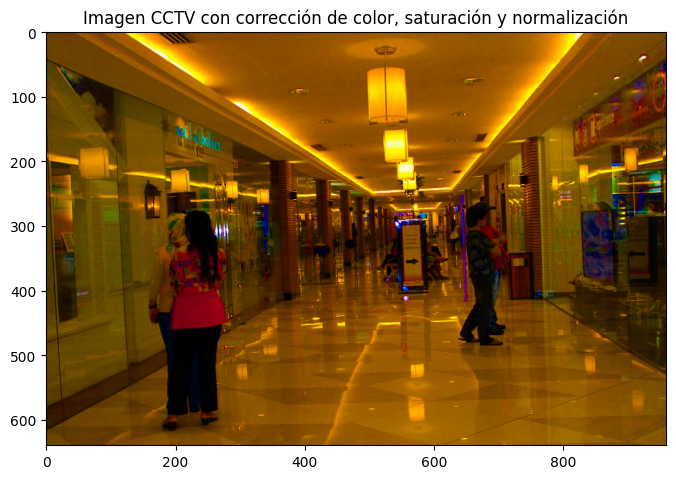

In [24]:
# mostrar la imagen usando matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(color_corrected)
plt.title('Imagen CCTV con corrección de color, saturación y normalización')
# plt.axis('off')
plt.show()

In [25]:
# convertir la imagen de BGR (formato OpenCV) a RGB (forma matplotlib)
color_corrected = cv2.cvtColor(color_corrected, cv2.COLOR_BGR2RGB)

# guardar la imagen ajustada
output_path = './data/cctv_image_con_ajuste_saturacion.jpg'
cv2.imwrite(output_path, color_corrected)

True

# 2.3) Aplicación de anotaciones

In [29]:
# hacer una copia de una imagen ya cargada
annotated = image.copy()

# dibujar una línea desde (150, 250) hasta (350, 250) en azul BGR: (255, 0, 0) con grosor de línea 3 píxeles
cv2.line(annotated, (150, 250), (350, 250), (255, 0, 0), 3)

# dibujar un rectángulo desde (150, 300), (350, 600), (0, 255, 0), 3)
cv2.rectangle(annotated, (200, 300), (350, 600), (0, 255, 0), 3)

# escribir texto: 'Persona' en rojo BGR: (0, 0, 255) ubicado en (200, 290)
cv2.putText(annotated, 'Persona', (200, 290), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2) 

array([[[ 64,  89, 109],
        [ 63,  88, 108],
        [ 61,  86, 106],
        ...,
        [ 81, 103, 115],
        [ 82, 104, 116],
        [ 83, 105, 117]],

       [[ 65,  90, 110],
        [ 64,  89, 109],
        [ 62,  87, 107],
        ...,
        [ 84, 106, 118],
        [ 83, 105, 117],
        [ 83, 105, 117]],

       [[ 66,  91, 111],
        [ 65,  90, 110],
        [ 63,  88, 108],
        ...,
        [ 86, 107, 122],
        [ 83, 104, 119],
        [ 82, 103, 118]],

       ...,

       [[ 38,  83, 110],
        [ 38,  83, 110],
        [ 38,  83, 110],
        ...,
        [ 56, 103, 134],
        [ 57, 104, 135],
        [ 58, 105, 136]],

       [[ 39,  84, 111],
        [ 38,  83, 110],
        [ 38,  83, 110],
        ...,
        [ 55, 105, 135],
        [ 55, 104, 136],
        [ 57, 106, 138]],

       [[ 39,  84, 111],
        [ 39,  84, 111],
        [ 38,  83, 110],
        ...,
        [ 54, 104, 134],
        [ 55, 103, 137],
        [ 57, 108, 140]]

(np.float64(-0.5), np.float64(959.5), np.float64(639.5), np.float64(-0.5))

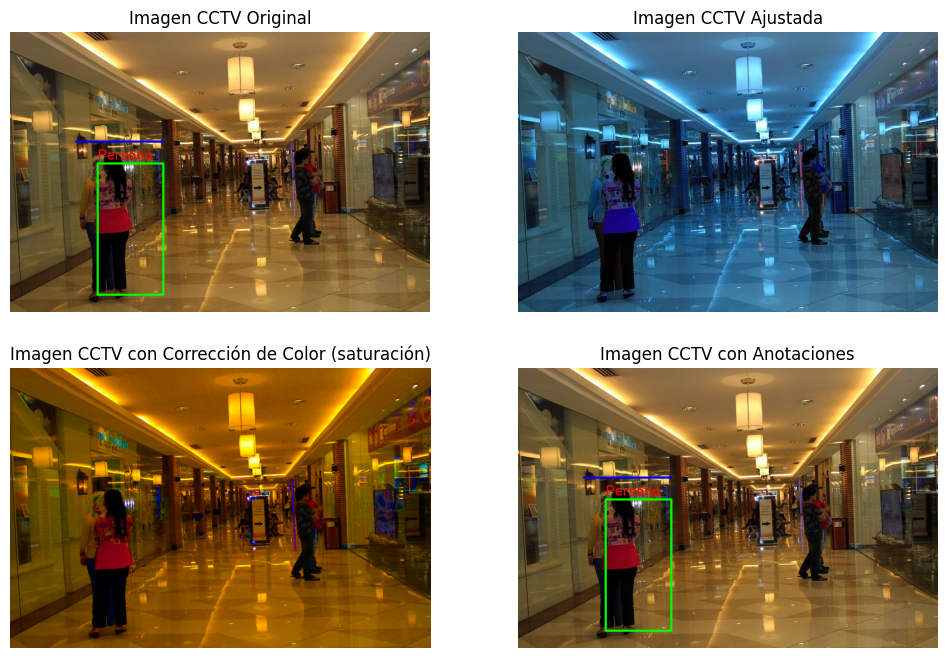

In [31]:
# convertir de BGR a RGB para visualizar con matplotlib
image_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
adjusted_rgb = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)
color_corrected_rgb = cv2.cvtColor(color_corrected, cv2.COLOR_BGR2RGB)
annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagen CCTV Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(adjusted_rgb)
plt.title('Imagen CCTV Ajustada')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(color_corrected_rgb)
plt.title('Imagen CCTV con Corrección de Color (saturación)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(annotated_rgb)
plt.title('Imagen CCTV con Anotaciones')
plt.axis('off')